## Exercise 1

A useful way to understand gradient descent is to start with a known error function.  Imagine that we have a quadratic error function such as $f(x) = x^2$.  The gradient of this error function is just the first derivative of the function $f(x)$.  Using this, finish the following code to calculate the gradient.  After you've done that, try manipulating the learning rate.  What happens?  How many iterations are needed to reach the minimum?

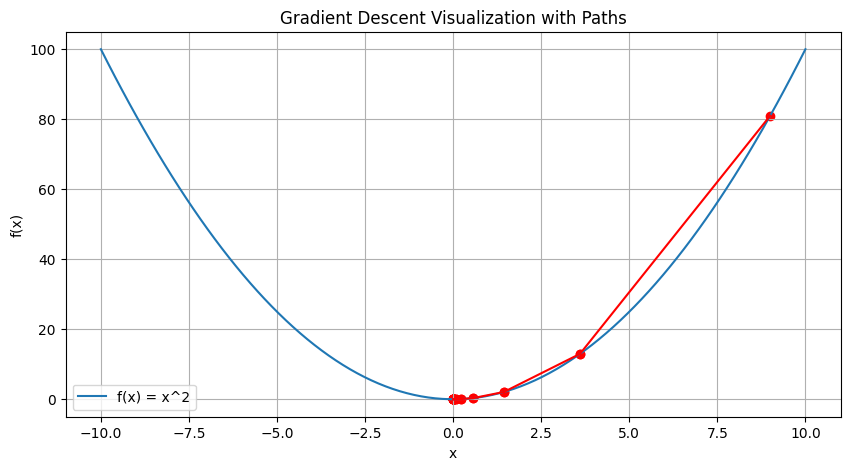

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function and Derivative
f = lambda x: x ** 2
df = lambda x: 2 * x

# Gradient Descent
def gradient_descent(starting_x, learning_rate, n_iter=10):
    x_path = [starting_x] # x_path is an array that stores our successive "guesses".  
    for _ in range(n_iter):
        gradient = df(x_path[-1]) # We are applying the gradient function (derivative) evaluated at our last guess
        new_x = x_path[-1] - learning_rate * gradient # Calculate new value using gradient descent update rule
        x_path.append(new_x)
    return x_path

# Parameters
starting_x = 9
learning_rate = .3
n_iter = 15

# Run Gradient Descent
x_path = gradient_descent(starting_x, learning_rate, n_iter)

# Plotting
x = np.linspace(-10, 10, 100)
y = f(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = x^2')

# Plot the steps with lines connecting them
for i in range(1, len(x_path)):
    plt.scatter(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')
    plt.plot(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')

plt.title('Gradient Descent Visualization with Paths')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


In the following, consider the the function $f(x) = (x-2)^4$.  Complete the code and examine the process of gradient decent.  What do you notice?  How are things different than in the previous example?

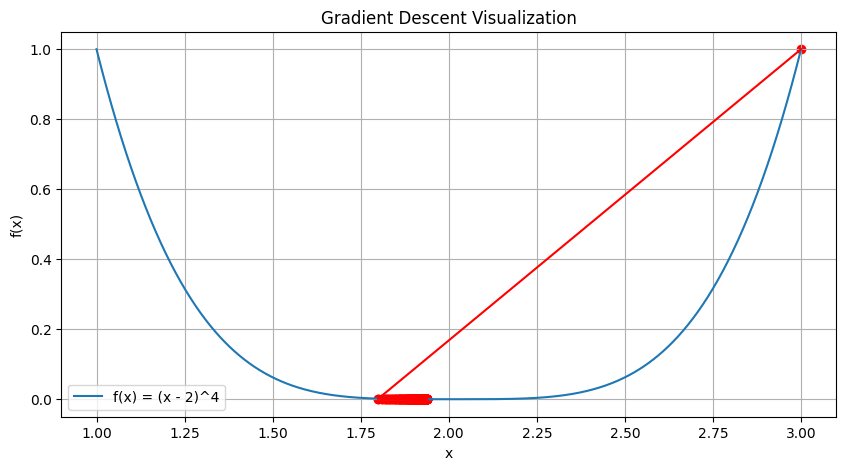

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function and Derivative
f = lambda x: (x - 2) ** 4
df = lambda x: 4 * (x - 2) ** 3

# Gradient Descent
def gradient_descent(starting_x, learning_rate, n_iter=10):
    x_path = [starting_x]
    for _ in range(n_iter):
        gradient = df(x_path[-1])
        new_x = x_path[-1] - learning_rate * gradient
        x_path.append(new_x)
        
    return x_path

# Parameters
starting_x = 3  
learning_rate = 0.3  
n_iter = 100

# Run Gradient Descent
x_path = gradient_descent(starting_x, learning_rate, n_iter)

# Plotting
x = np.linspace(1, 3, 1000)  # Range includes the minimum and starting point
y = f(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = (x - 2)^4')

# Plot the steps with lines connecting them
for i in range(1, len(x_path)):
    plt.scatter(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')
    plt.plot(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')

plt.title('Gradient Descent Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


## Exercise 2

Take a few moments to play with the following code.  Try using the different activation functions (`identity`,`tanh`,`logistic`,`relu`) and solvers (`lbfgs`,`sgd`,`adam`).  Try reconfiguring the size and number of hidden layers.  Try changing the number of classes in your sample data. What do you find? Can you identify a good configuration for 10 classes?



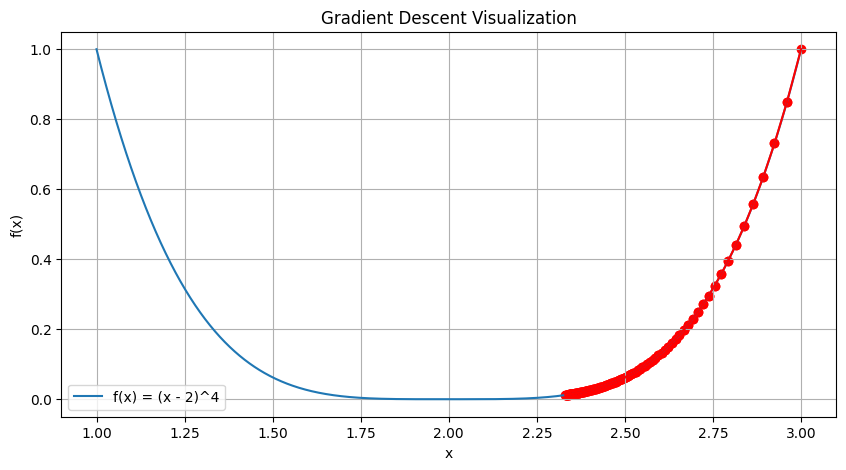

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function and Derivative
f = lambda x: (x - 2) ** 4
df = lambda x: 4 * (x - 2) ** 3

# Gradient Descent
def gradient_descent(starting_x, learning_rate, n_iter=10):
    x_path = [starting_x]
    for _ in range(n_iter):
        gradient = df(x_path[-1])
        new_x = x_path[-1] - learning_rate * gradient
        x_path.append(new_x)
        
    return x_path

# Parameters
starting_x = 3  
learning_rate = .01
n_iter = 100

# Run Gradient Descent
x_path = gradient_descent(starting_x, learning_rate, n_iter)

# Plotting
x = np.linspace(1, 3, 1000)  # Range includes the minimum and starting point
y = f(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = (x - 2)^4')

# Plot the steps with lines connecting them
for i in range(1, len(x_path)):
    plt.scatter(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')
    plt.plot(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')

plt.title('Gradient Descent Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


## Exercise 3

Check out the [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.80814&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). Explore the following:

   - The patterns learned by a neural net. Try training the default neural network by clicking the Run button (top left). Notice how it quickly finds a good solution for the classification task. The neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers there are, the more complex the patterns can be.
   
   - Activation functions. Try replacing the tanh activation function with a ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.
   - The risk of local minima. Modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, click the Reset button next to the Play button). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum.
   - What happens when neural nets are too small? Remove one neuron to keep just two. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and systematically underfits the training set.
   - What happens when neural nets are large enough? Set the number of neurons to eight, and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks rarely get stuck in local minima, and even when they do these local optima are often almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.
   - The risk of vanishing gradients in deep networks. Select the spiral dataset (the bottom-right dataset under “DATA”), and change the network architecture to have four hidden layers with eight neurons each. Notice that training takes much longer and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (on the right) tend to evolve faster than the neurons in the lowest layers (on the left). This problem, called the vanishing gradients problem, can be alleviated with better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or batch normalization. (discussed in Chapter 11 in the book).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function and Derivative
f = lambda x: (x - 2) ** 4
df = lambda x: 4 * (x - 2) ** 3

# Gradient Descent
def gradient_descent(starting_x, learning_rate, n_iter=10):
    x_path = [starting_x]
    for _ in range(n_iter):
        gradient = df(x_path[-1])
        new_x = x_path[-1] - learning_rate * gradient
        x_path.append(new_x)
        
    return x_path

# Parameters
starting_x = 3  
learning_rate = .01
n_iter = 100

# Run Gradient Descent
x_path = gradient_descent(starting_x, learning_rate, n_iter)

# Plotting
x = np.linspace(1, 3, 1000)  # Range includes the minimum and starting point
y = f(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = (x - 2)^4')

# Plot the steps with lines connecting them
for i in range(1, len(x_path)):
    plt.scatter(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')
    plt.plot(x_path[i-1:i+1], f(np.array(x_path[i-1:i+1])), color='red')

plt.title('Gradient Descent Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


## Exercise 3 

Try building a MLP in Keras to fit the MNIST handwriting data using the Sequential API. Here are some tips:

- Make sure to flatten your images with a "Flatten" layer
- Add one or two Dense layers with ReLU activation
- Finish with a dense output layer with 10 neurons (one for each digit)
- Compile the model with the `adam` optimizer, `sparse_categorical_crossentropy` loss, and `accuracy` metric
- Use a validation_split parameter with 20 percent of your data for validation during training
- Train with a reasonable number of epochs (e.g. 5-10) and evaluate your performance on the test set
- Explore with different numbers of neurons, layers, and epochs!


In [20]:
pip install tensorflow

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation split
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)


2024-03-28 16:11:26.448662: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 16:11:26.783331: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 16:11:26.954746: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-28 16:11:28.331715: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


2024-03-28 16:11:33.908530: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8688 - loss: 0.4647

2024-03-28 16:11:37.247307: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8690 - loss: 0.4640 - val_accuracy: 0.9563 - val_loss: 0.1474
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9641 - loss: 0.1207 - val_accuracy: 0.9644 - val_loss: 0.1196
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9760 - loss: 0.0776 - val_accuracy: 0.9678 - val_loss: 0.1047
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9827 - loss: 0.0572 - val_accuracy: 0.9733 - val_loss: 0.0954
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9850 - loss: 0.0475 - val_accuracy: 0.9743 - val_loss: 0.0952
 59/313 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.9779 - loss: 0.0695

2024-03-28 16:11:55.773007: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9735 - loss: 0.0914

Test accuracy: 0.9760000109672546
